In [21]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator, \
                              AutoLocator, NullLocator, LinearLocator, \
                              LogLocator, IndexLocator

def depth_track(ax, 
                width,
                loc, 
                labels='none',
                ymin=0, ymax=10000, 
                min_tick_int='none', 
                remove_spine='none'):
    
    if min_tick_int is 'none':
        min_tick_int= abs((ymax-ymin)/100)
    ax.set_ylim(ymax, ymin), ax.set_xlim(0, 1), ax.set_xticks([])
    ax.spines['right'].set_color('k')
    ax.spines['left'].set_color('k')
    
    if remove_spine=='right':
        ax.spines['right'].set_color('none')
        ax.yaxis.set_ticks_position('left')
    
    if remove_spine=='left':
        ax.spines['left'].set_color('none')
        ax.yaxis.set_ticks_position('right')


    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_minor_locator(MultipleLocator(min_tick_int))
    for label in ax.get_yticklabels():
        label.set_horizontalalignment('center')
    ax.tick_params(axis='y', labelsize=11, pad=-30,length=8)
    

    ax.plot(np.zeros(11),np.arange(11))
    ax.yaxis.set_major_locator(eval(loc))
    if labels is not 'none':
        ax.set_yticklabels(labels)
    return ax


def plot_well(tracks, yscales):
    
    # subplot params
    nytr = tracks.count('yscale') # number of depth tracks
    nlogs = len(tracks)-nytr # number of logs
    tw = 3.0 # width of logs tracks
    yw = 1.0 # width of depth tracks
    plotwidth= nlogs*tw + nytr*yw
    
    # instantiate figure
    fig = plt.figure(figsize=(plotwidth, 15))
    axarr = list([None])*(nlogs + nytr)
    ftr = tw / plotwidth # fraction of regular track
    fz = ftr*yw/tw  # fraction of depth track
    wo = 0.0  # margin spacing
    dx = ftr*np.ones(nlogs + nytr)
    dtind = [i for i, x in enumerate(tracks) if x == 'yscale'] # depth_track_indicies 

    budge = 0.85
    dx[dtind] = fz*budge
    x = wo    # initialization of starting x position of track 0
    k=0
    
    for i, (width, track) in enumerate(zip(dx, tracks)):
        if i in dtind: # this track is a depth track
            rs='none'
            if i == 0: # remove outside (left) spine
                rs = 'left'
            if i == len(dx)-1: # remove outside (right)
                rs = 'right'
            
            axarr[i] = fig.add_axes([x, 0.1, width, 0.8])

            if yscales[k][2]=='none':
                labels='none'
            else:
                labels = yscales[k][2]

            axarr[i] = depth_track(axarr[i], 
                                   width=width, 
                                   loc = yscales[k][1],
                                   labels = labels,
                                   ymin=0, ymax=10000,
                                   remove_spine=rs)
            axarr[i].text(0.5,0, yscales[k][0], ha='center',va='center',fontsize=14,
                          bbox=dict(facecolor='w', alpha=1.0, ec='none'))
            x += width+wo
            k +=1

        if i not in dtind:  #this is a regular track
            m = 0 # number of curves that exist in this track already
            axarr[i] = fig.add_axes([x, 0.1, width, 0.8])
            axarr[i].patch.set_alpha(0.05)
            axarr[i].set_yticks([])
            axarr[i].set_xticks([0.2, 0.4, 0.6, 0.8])
            axarr[i].xaxis.set_tick_params(labeltop='on')
            plt.xticks(rotation='vertical', fontsize=13)
            
            if type(track)==str:
                axarr[i].text(0.5,1.05, track +' [units]', ha='center', va='center', fontsize=14,
                              bbox=dict(facecolor='w', alpha=1.0, ec='none'))
            else:
                for j, curve in enumerate(track):
                    axarr[i].text(0.5,1.05+0.025*j, curve +' [units]', ha='center', va='center', fontsize=14,
                                  bbox=dict(facecolor='w', alpha=1.0, ec='none'))

            x += width+wo
              

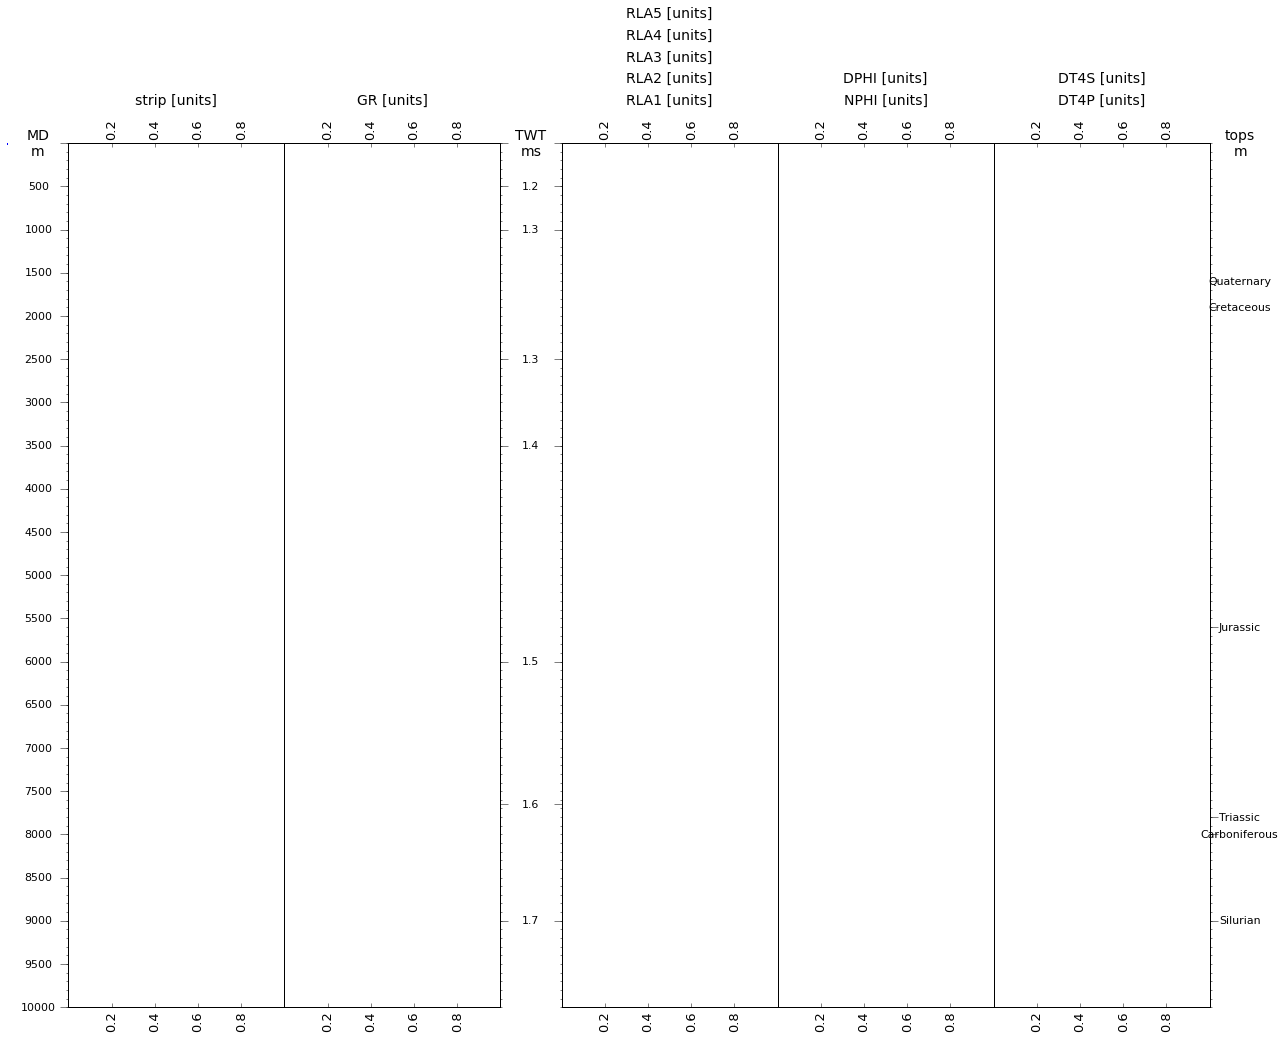

In [23]:
tracks = ['yscale','strip','GR','yscale',['RLA1','RLA2','RLA3','RLA4','RLA5'],['NPHI','DPHI'],['DT4P','DT4S'],'yscale']

# Make some vertical scales: each yscale is a tuple with three elements.
# 1: Name (label),
# 2: Locator method to use
# 3: list of labels to put at tick locations

md_labels = 'none' # no re-labeling the axis (tick location = tick label)
twt_labels = [1.1, 1.2, 1.3, 1.3, 1.4, 1.5, 1.6, 1.7]
tops_labels = ['Quaternary', 'Cretaceous', 'Jurassic', 'Triassic', 'Carboniferous', 'Silurian', 'Cambrian']

yscales = [('MD\nm', 'MultipleLocator(500)', md_labels), # put tick every 500 meters...
           ('TWT\nms','FixedLocator([0, 500, 1000, 2500, 3500, 6000, 7654, 9000])', twt_labels), 
           ('tops\nm','FixedLocator([1600, 1900, 5600, 7800, 8000, 9000])', tops_labels)]

plot_well(tracks, yscales)

In [24]:
%matplotlib inline

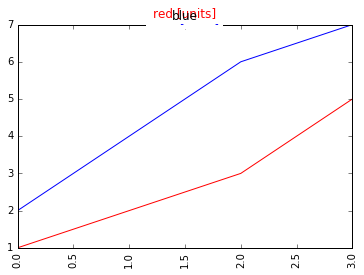

In [25]:
fig = plt.figure()
ax = plt.subplot(111)
ax2 = plt.subplot(111)
ax.plot([1,2,3,5],'r', label='blue')
ax.set_title('red')
ax2.plot([2,4,6,7],'b', label='red')
ax2.set_title('blue')
ax2.text(0.5,1.025, 'blue [units]', color='b', ha='center', va='center', fontsize=12,
         transform=ax.transAxes,
         bbox=dict(facecolor='w', alpha=1.0, ec='none'))
ax2.text(0.5,1.025+0.025, 'red [units]', color='r', ha='center', va='center', fontsize=12,
         transform=ax.transAxes,
         bbox=dict(facecolor='w', alpha=1.0, ec='none'))
labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(90) 


In [26]:
ax.set_xticks

<bound method _AxesBase.set_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x10ee98438>>

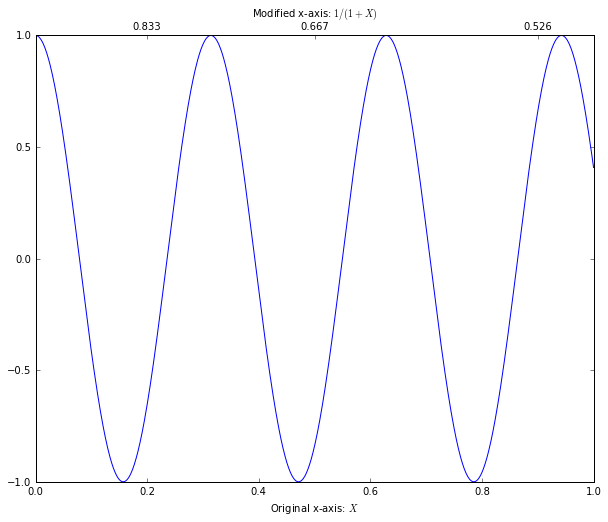

In [27]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = np.linspace(0,1,1000)
Y = np.cos(X*20)

ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")

new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
plt.show()


In [37]:
ax2.xaxis.get_label
